**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
suppressMessages(suppressWarnings(library("DESeq2")))
suppressMessages(suppressWarnings(library("GGally")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_CombEffect_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_CombEffect_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_CombEffect_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_CombEffect_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_CombEffect_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_CombEffect_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_CombEffect_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_CombEffect_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_CombEffect_ENCODE_FCC/references 



In [2]:
TXT_ASSAY = "STARR_ATAC_K562_Reddy_KS91"

In [71]:
txt_fdiry = file.path(FD_RES, "assay_fcc", txt_assay, "coverage")
dir(txt_fdiry)

[1] "encode_open_chromatin" "fcc_astarr_macs"

In [72]:
txt_fdiry = file.path(FD_RES, "assay_fcc", txt_assay, "coverage", "encode_open_chromatin")
dir(txt_fdiry)

[1] "atac_ENCFF333TAT"  "atac_ENCFF558BLC"  "atac_ENCFF925CYR" 
[4] "atac_ENCFF948AFM"  "dnase_ENCFF185XRG" "dnase_ENCFF274YGF"

In [84]:
###
txt_assay         = TXT_ASSAY
txt_region_folder = "encode_open_chromatin"
txt_region_label  = "atac_ENCFF333TAT"

###
txt_fdiry = file.path(
    FD_RES, "assay_fcc", txt_assay, "coverage", 
    txt_region_folder, 
    txt_region_label, 
    "summary"
)

txt_fname = "data_list_count_column.rds"
txt_fpath = file.path(txt_fdiry, txt_fname)
lst = readRDS(txt_fpath)

txt_fname = "data_deseq2.rds"
txt_fpath = file.path(txt_fdiry, txt_fname)
dds = readRDS(txt_fpath)


###
lst_dat_ocr_atac_ENCFF333TAT = lst
dds_ocr_atac_ENCFF333TAT = dds

In [30]:
###
txt_assay         = TXT_ASSAY
txt_region_folder = "fcc_astarr_macs"
txt_region_label  = "astarr_macs_input_union"

###
txt_fdiry = file.path(
    FD_RES, "assay_fcc", txt_assay, "coverage", 
    txt_region_folder, 
    txt_region_label, 
    "summary"
)

txt_fname = "data_list_count_column.rds"
txt_fpath = file.path(txt_fdiry, txt_fname)
lst = readRDS(txt_fpath)

txt_fname = "data_deseq2.rds"
txt_fpath = file.path(txt_fdiry, txt_fname)
dds = readRDS(txt_fpath)


###
lst_dat_ocr_macs_union = lst
dds_ocr_macs_union = dds

In [4]:
###
txt_assay         = TXT_ASSAY
txt_region_folder = "fcc_astarr_macs"
txt_region_label  = "astarr_macs_input_overlap"

###
txt_fdiry = file.path(
    FD_RES, "assay_fcc", txt_assay, "coverage", 
    txt_region_folder, 
    txt_region_label, 
    "summary"
)
txt_fname = "data_list_count_column.rds"
txt_fpath = file.path(txt_fdiry, txt_fname)

###
lst = readRDS(txt_fpath)

###
lst_dat_ocr_macs_overlap = lst

In [123]:
lst = lst_dat_ocr_macs_union
dds = dds_ocr_macs_union

#lst = lst_dat_ocr_atac_ENCFF333TAT
#dds = dds_ocr_atac_ENCFF333TAT

dat_col = lst$data_col
dat_cnt = lst$data_cnt
vec_row = setNames(dat_cnt$Chrom, dat_cnt$Region)

mat_cnt_unrm = counts(dds, normalized = FALSE)
mat_cnt_norm = counts(dds, normalized = TRUE)

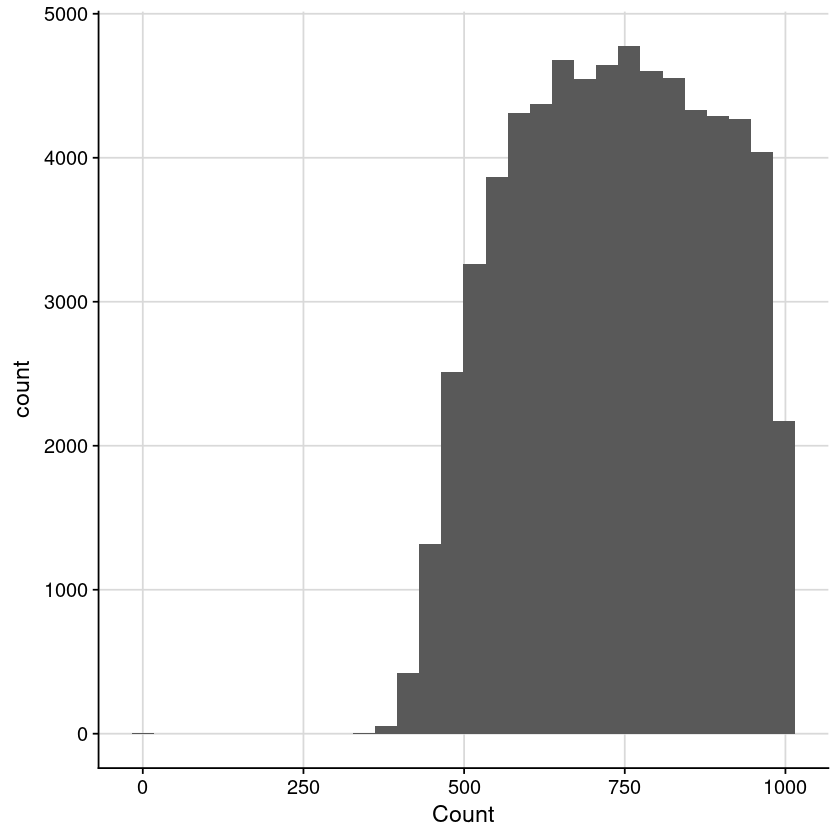

In [128]:
mat = mat_cnt_unrm
vec = apply(mat, 1, sum)

dat = data.frame(
    Region = rownames(mat),
    Count  = vec
)

dat = dat %>% dplyr::filter(Count < 1000)
gpt = ggplot(dat, aes(x=Count)) + geom_histogram(bins = 30) + theme_cowplot() + background_grid()
print(gpt)

In [139]:
mat = mat_cnt_unrm
vec = apply(mat, 1, sum)
vec = sort(vec)
head(vec)

chr21:8396525-8397035   chr21:8219783-8221061 chr15:29722409-29722637 
                      1                       8                     343 
 chr3:17244164-17244399 chr19:56235849-56236109  chr2:87657668-87657909 
                    349                     352                     353

In [141]:
dat = data.frame(
    CumSum = cumsum(vec),
    CumRow = 1:length(vec)
)
head(dat)

,CumSum,CumRow
,<int>,<int>
chr21:8396525-8397035,1,1
chr21:8219783-8221061,9,2
chr15:29722409-29722637,352,3
chr3:17244164-17244399,701,4
chr19:56235849-56236109,1053,5
chr2:87657668-87657909,1406,6


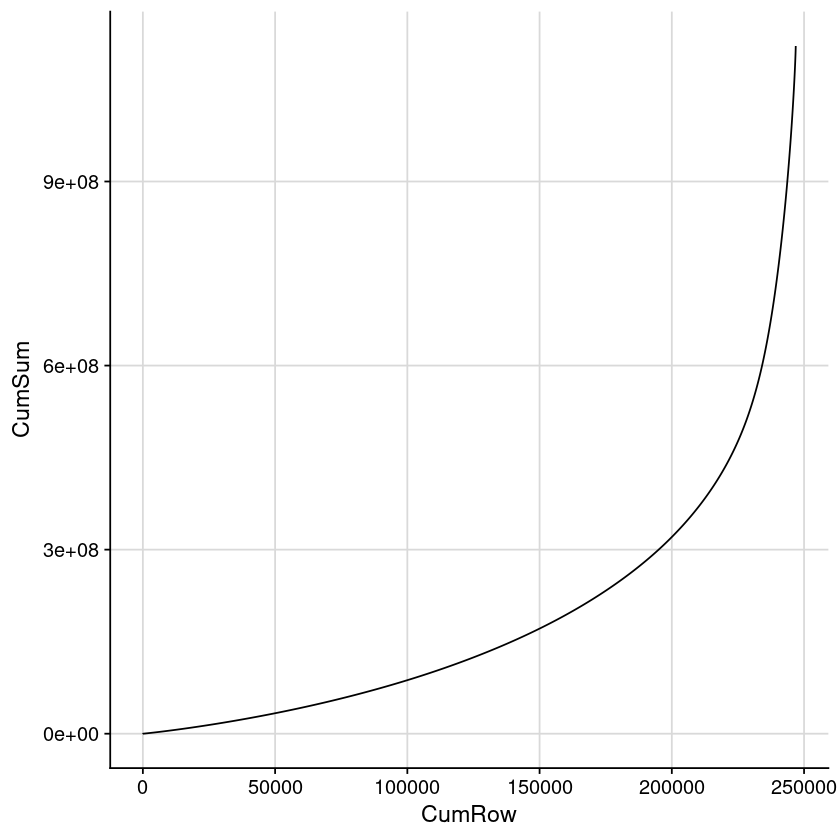

In [142]:
ggplot(dat, aes(x=CumRow, y = CumSum)) + geom_line() + theme_cowplot() + background_grid()

In [151]:
mat = mat_cnt_unrm
vec = apply(mat, 1, sum)
vec = sort(vec, decreasing = TRUE)
idx = names(vec)
head(vec)

chr9:131273110-131279259  chr13:91346980-91349411 chr7:105012385-105014543 
                  318730                   304738                   230583 
 chr22:21628337-21630433  chr22:19722098-19724624  chr16:85610448-85614503 
                  223017                   220505                   208078

In [150]:
dat = data.frame(
    CumSum = cumsum(vec)/sum(vec),
    CumRow = 1:length(vec)/length(vec)
)
head(dat)

,CumSum,CumRow
,<dbl>,<dbl>
chr9:131273110-131279259,0.0002843738,4.051010e-06
chr13:91346980-91349411,0.0005562639,8.102021e-06
chr7:105012385-105014543,0.0007619921,1.215303e-05
chr22:21628337-21630433,0.0009609699,1.620404e-05
chr22:19722098-19724624,0.0011577065,2.025505e-05
chr16:85610448-85614503,0.0013433556,2.430606e-05


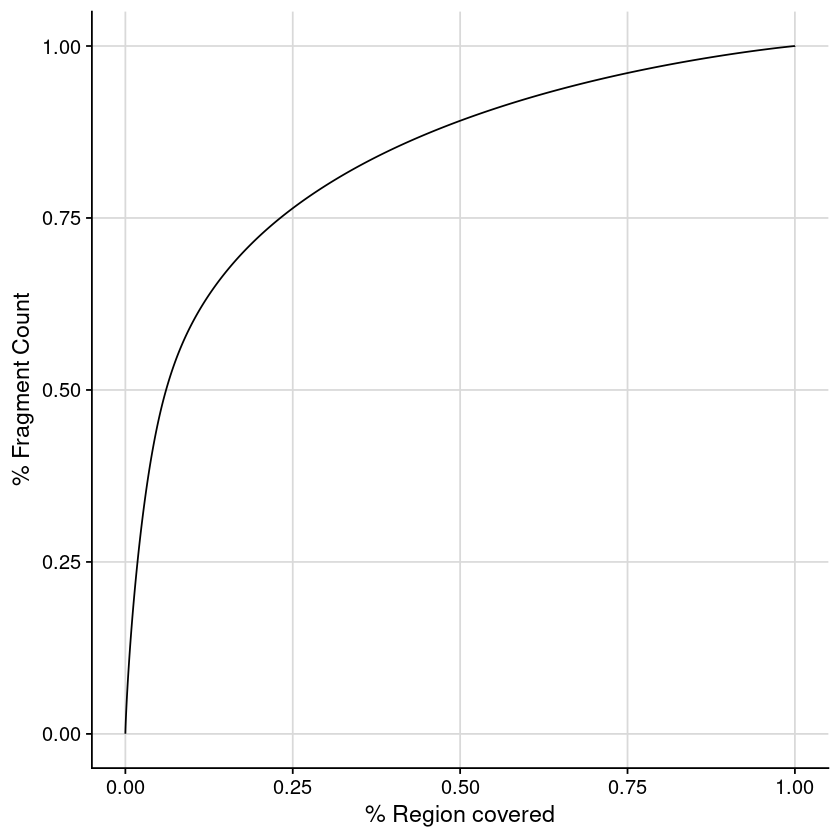

In [148]:
ggplot(dat, aes(x=CumRow, y = CumSum)) + 
    geom_line() + 
    labs(x = "% Region covered", y = "% Fragment Count") +
    theme_cowplot() + 
    background_grid()

In [130]:
dat %>% dplyr::filter(Count < 200)

,Region,Count
,<chr>,<int>
chr21:8219783-8221061,chr21:8219783-8221061,8
chr21:8396525-8397035,chr21:8396525-8397035,1


In [85]:
#lst = lst_dat_ocr_macs_union
#dds = dds_ocr_macs_union

lst = lst_dat_ocr_atac_ENCFF333TAT
dds = dds_ocr_atac_ENCFF333TAT

dat_col = lst$data_col
dat_cnt = lst$data_cnt
vec_row = setNames(dat_cnt$Chrom, dat_cnt$Region)

mat_cnt_unrm = counts(dds, normalized = FALSE)
mat_cnt_norm = counts(dds, normalized = TRUE)

In [86]:
dat = dat_cnt
head(dat)

Chrom,ChromStart,ChromEnd,Region,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
chr1,40649,41403,chr1:40649-41403,1,0,2,1,1,1,1,0,0,0
chr1,42030,42399,chr1:42030-42399,0,0,0,0,0,1,0,0,0,0
chr1,46255,47025,chr1:46255-47025,4,4,4,4,3,3,0,0,0,0
chr1,67629,67864,chr1:67629-67864,0,0,1,0,0,0,0,0,0,0
chr1,68056,68341,chr1:68056-68341,1,2,2,0,1,1,0,0,0,3
chr1,68963,70035,chr1:68963-70035,24,29,20,25,23,19,0,0,0,5


In [87]:
mat = mat_cnt_unrm
head(mat)

,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
chr1:40649-41403,1,0,2,1,1,1,1,0,0,0
chr1:42030-42399,0,0,0,0,0,1,0,0,0,0
chr1:46255-47025,4,4,4,4,3,3,0,0,0,0
chr1:67629-67864,0,0,1,0,0,0,0,0,0,0
chr1:68056-68341,1,2,2,0,1,1,0,0,0,3
chr1:68963-70035,24,29,20,25,23,19,0,0,0,5


In [110]:
mat = mat_cnt_norm
head(mat)

,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
chr1:40649-41403,0.6246304,0.0000000,0.8969816,0.4794798,0.4918124,0.5516444,5.290238,0,0,0.000000
chr1:42030-42399,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.5516444,0.000000,0,0,0.000000
chr1:46255-47025,2.4985218,1.9316929,1.7939633,1.9179191,1.4754373,1.6549331,0.000000,0,0,0.000000
chr1:67629-67864,0.0000000,0.0000000,0.4484908,0.0000000,0.0000000,0.0000000,0.000000,0,0,0.000000
chr1:68056-68341,0.6246304,0.9658464,0.8969816,0.0000000,0.4918124,0.5516444,0.000000,0,0,4.229284
chr1:68963-70035,14.9911307,14.0047733,8.9698164,11.9869942,11.3116860,10.4812428,0.000000,0,0,7.048806


## Independent filtering

In [113]:
dds = dds_ocr_atac_ENCFF333TAT
res = results(dds, alpha=0.5)
dat = as.data.frame(res)
summary(res)


out of 161187 with nonzero total read count
adjusted p-value < 0.5
LFC > 0 (up)       : 68048, 42%
LFC < 0 (down)     : 66736, 41%
outliers [1]       : 1, 0.00062%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [114]:
metadata(res)$filterThreshold

0% 
0.04484908

In [105]:
head(dat)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:40649-41403,0.83347868,0.6965364,1.3129852,0.5304983,0.59576650,0.667365463
chr1:42030-42399,0.05516444,1.9203430,3.2259252,0.5952844,0.55165337,0.627240022
chr1:46255-47025,1.12724674,-1.9117184,1.1159316,-1.7131143,0.08669152,0.130602948
chr1:67629-67864,0.04484908,1.9203430,3.2259252,0.5952844,0.55165337,0.627240022
chr1:68056-68341,0.77601988,1.4703311,1.2334925,1.1920065,0.23325868,0.306527365
chr1:68963-70035,7.87944492,-2.0050231,0.6904276,-2.9040308,0.00368392,0.007862352


In [107]:
txt = "chr1:42030-42399"
dat[txt,]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:42030-42399,0.05516444,1.920343,3.225925,0.5952844,0.5516534,0.62724


In [108]:
sum(is.na(dat$padj))

[1] 1

In [109]:
dat %>% dplyr::filter(is.na(padj))

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr5:68664229-68664451,16.33575,-0.08613741,0.8220073,-0.1047891,NA,NA


## Scatter plot

In [97]:
mat = mat_cnt_unrm
mat = dat %>% 
    dplyr::select(starts_with("Output"))
print(dim(mat))

set.seed(123)
num = 10000
idx = sample(1:nrow(mat), size = num)
mat = mat[idx,]
print(dim(mat))

head(mat)

[1] 161187      4
[1] 10000     4


Output.rep1,Output.rep2,Output.rep3,Output.rep4
<int>,<int>,<int>,<int>
4,25,11,37
132,221,252,370
234,401,458,798
19,32,46,59
93,205,257,418
125,180,198,424


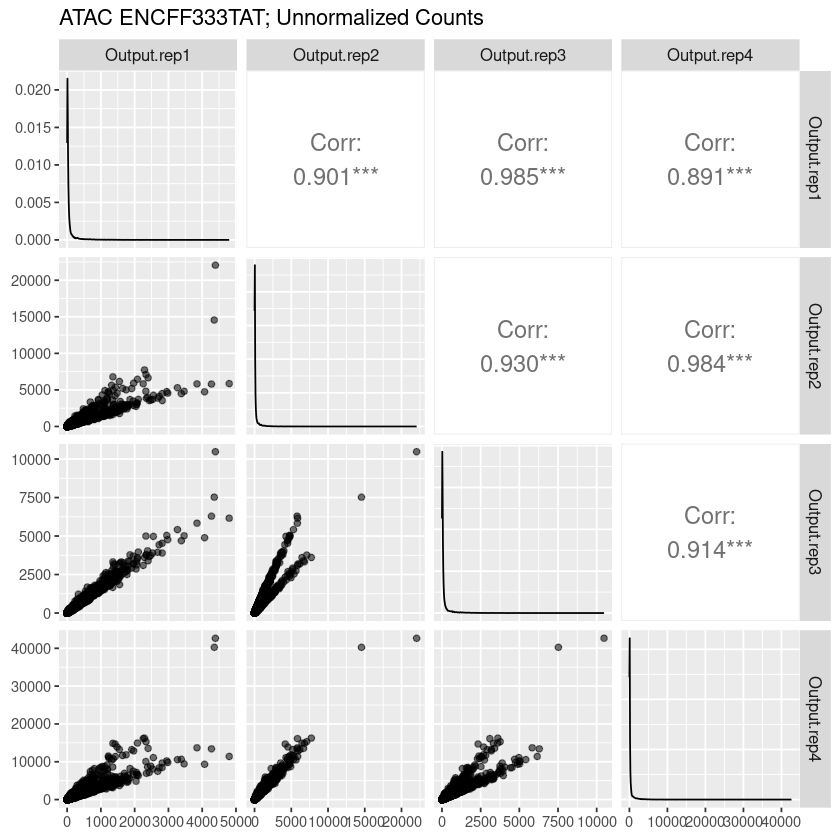

In [98]:
options(repr.plot.width = 7, repr.plot.height = 7)
ggpairs(
    mat, 
    aes(alpha = 0.5),
    upper = list(continuous = wrap("cor", size = 5))
    ) +
    labs(title = "ATAC ENCFF333TAT; Unnormalized Counts") +
    theme(
        strip.text = element_text(size = 10))

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for 

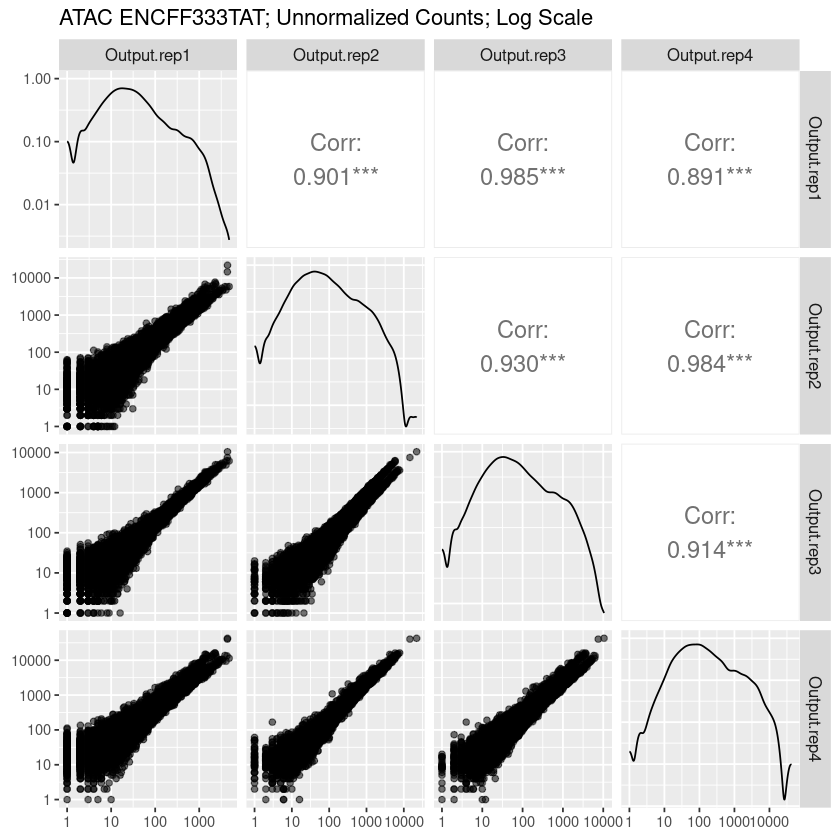

In [99]:
idx = apply(mat, 1, function(x){ all(x != 0 ) })
tmp = mat[idx,]

options(repr.plot.width = 7, repr.plot.height = 7)
ggpairs(
    tmp, 
    aes(alpha = 0.5),
    upper = list(continuous = wrap("cor", size = 5))
    ) +
    scale_x_continuous(trans='log10') +    
    scale_y_continuous(trans='log10') +
    labs(title = "ATAC ENCFF333TAT; Unnormalized Counts; Log Scale") +
    theme(
        strip.text = element_text(size = 10))

In [78]:
mat = mat_cnt_unrm
mat = dat %>% 
    dplyr::select(starts_with("Output"))
print(dim(mat))

set.seed(123)
num = 100000
idx = sample(1:nrow(mat), size = num)
mat = mat[idx,]
print(dim(mat))

head(mat)

[1] 161187      4
[1] 100000      4


Output.rep1,Output.rep2,Output.rep3,Output.rep4
<int>,<int>,<int>,<int>
4,25,11,37
132,221,252,370
234,401,458,798
19,32,46,59
93,205,257,418
125,180,198,424


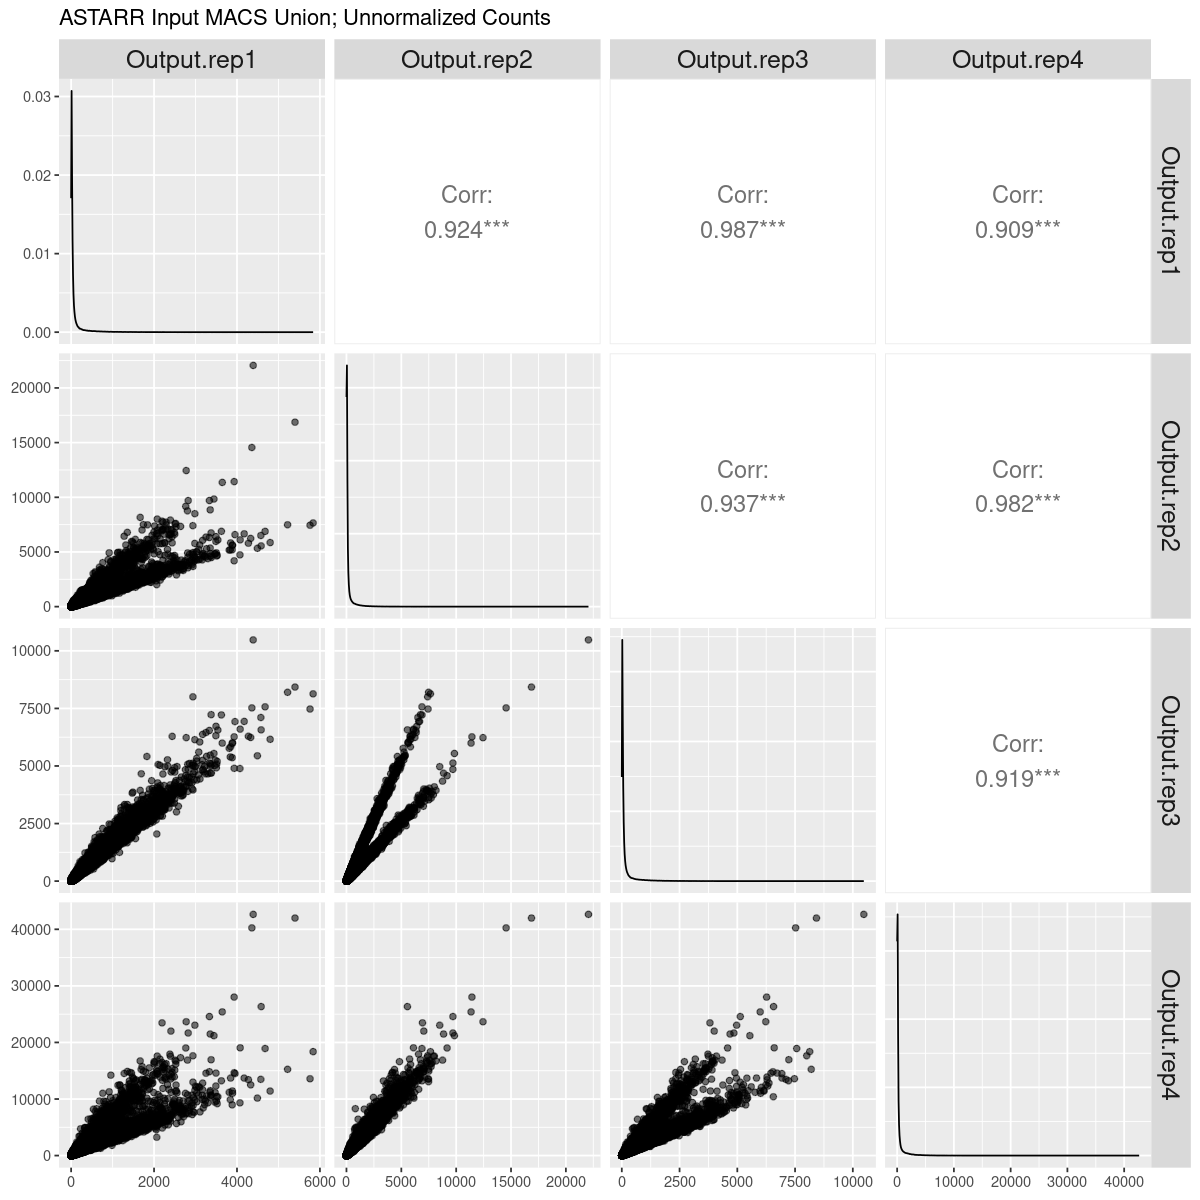

In [79]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggpairs(
    mat, 
    aes(alpha = 0.5),
    upper = list(continuous = wrap("cor", size = 5))
    ) +
    labs(title = "ASTARR Input MACS Union; Unnormalized Counts") +
    theme(
        strip.text = element_text(size = 15))

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for 

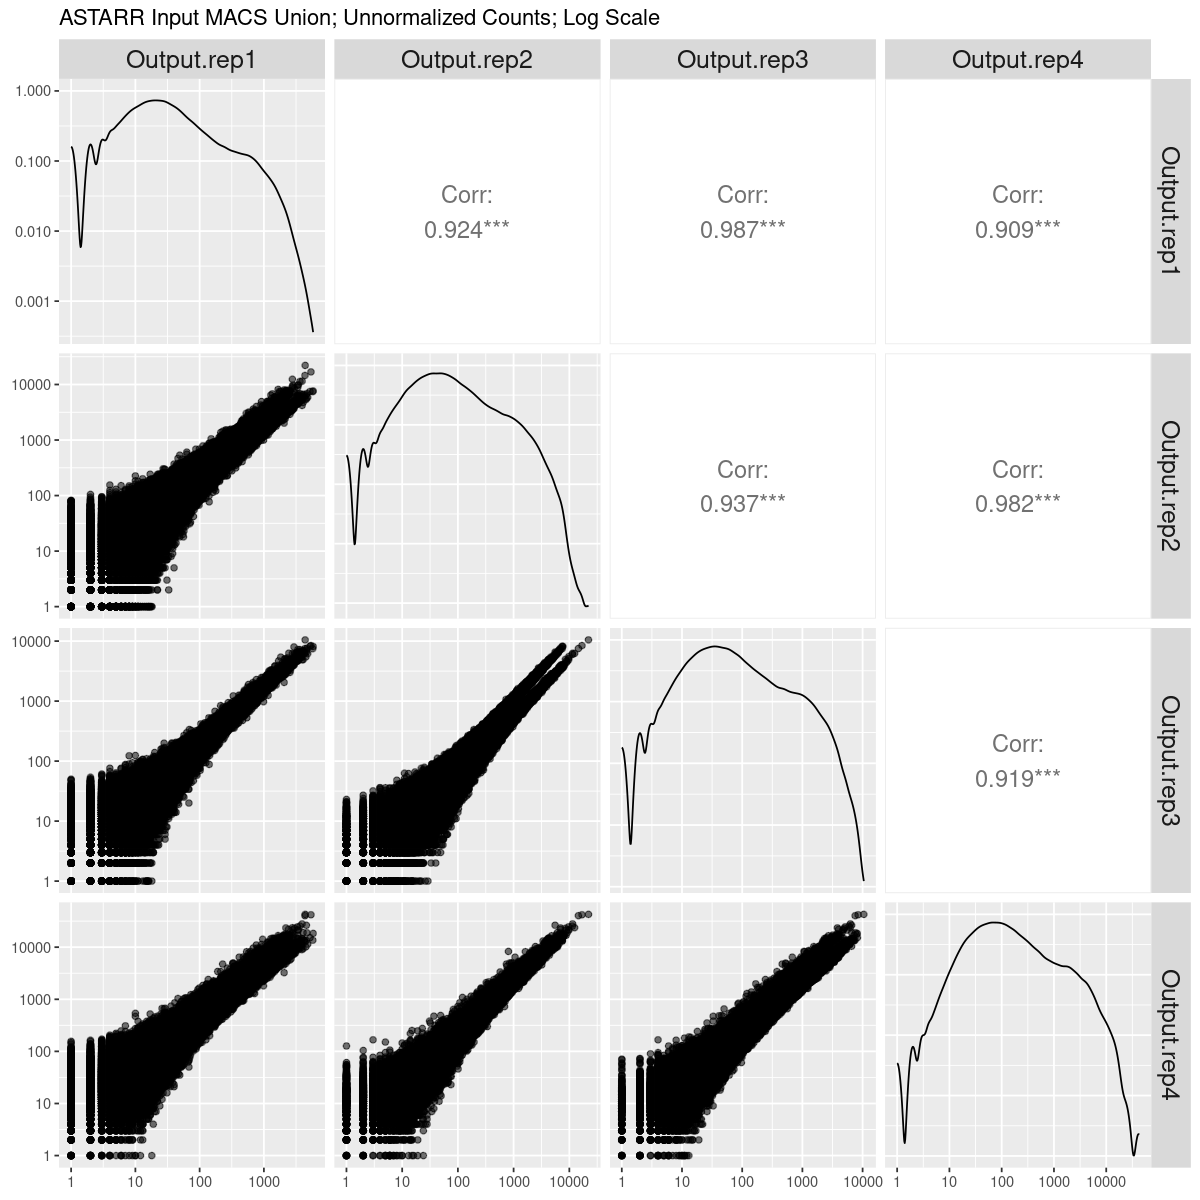

In [80]:
idx = apply(mat, 1, function(x){ all(x != 0 ) })
tmp = mat[idx,]

options(repr.plot.width = 10, repr.plot.height = 10)
ggpairs(
    tmp, 
    aes(alpha = 0.5),
    upper = list(continuous = wrap("cor", size = 5))
    ) +
    scale_x_continuous(trans='log10') +    
    scale_y_continuous(trans='log10') +
    labs(title = "ASTARR Input MACS Union; Unnormalized Counts; Log Scale") +
    theme(
        strip.text = element_text(size = 15))

In [68]:
mat = mat_cnt_norm
mat = dat %>% 
    dplyr::select(starts_with("Output"))
print(dim(mat))

set.seed(123)
num = 100000
idx = sample(1:nrow(mat), size = num)
mat = mat[idx,]
print(dim(mat))

head(mat)

[1] 246852      4
[1] 100000      4


Output.rep1,Output.rep2,Output.rep3,Output.rep4
<int>,<int>,<int>,<int>
13,92,46,153
9,18,24,28
21,4,12,16
9,62,29,114
5,12,11,20
123,185,222,421


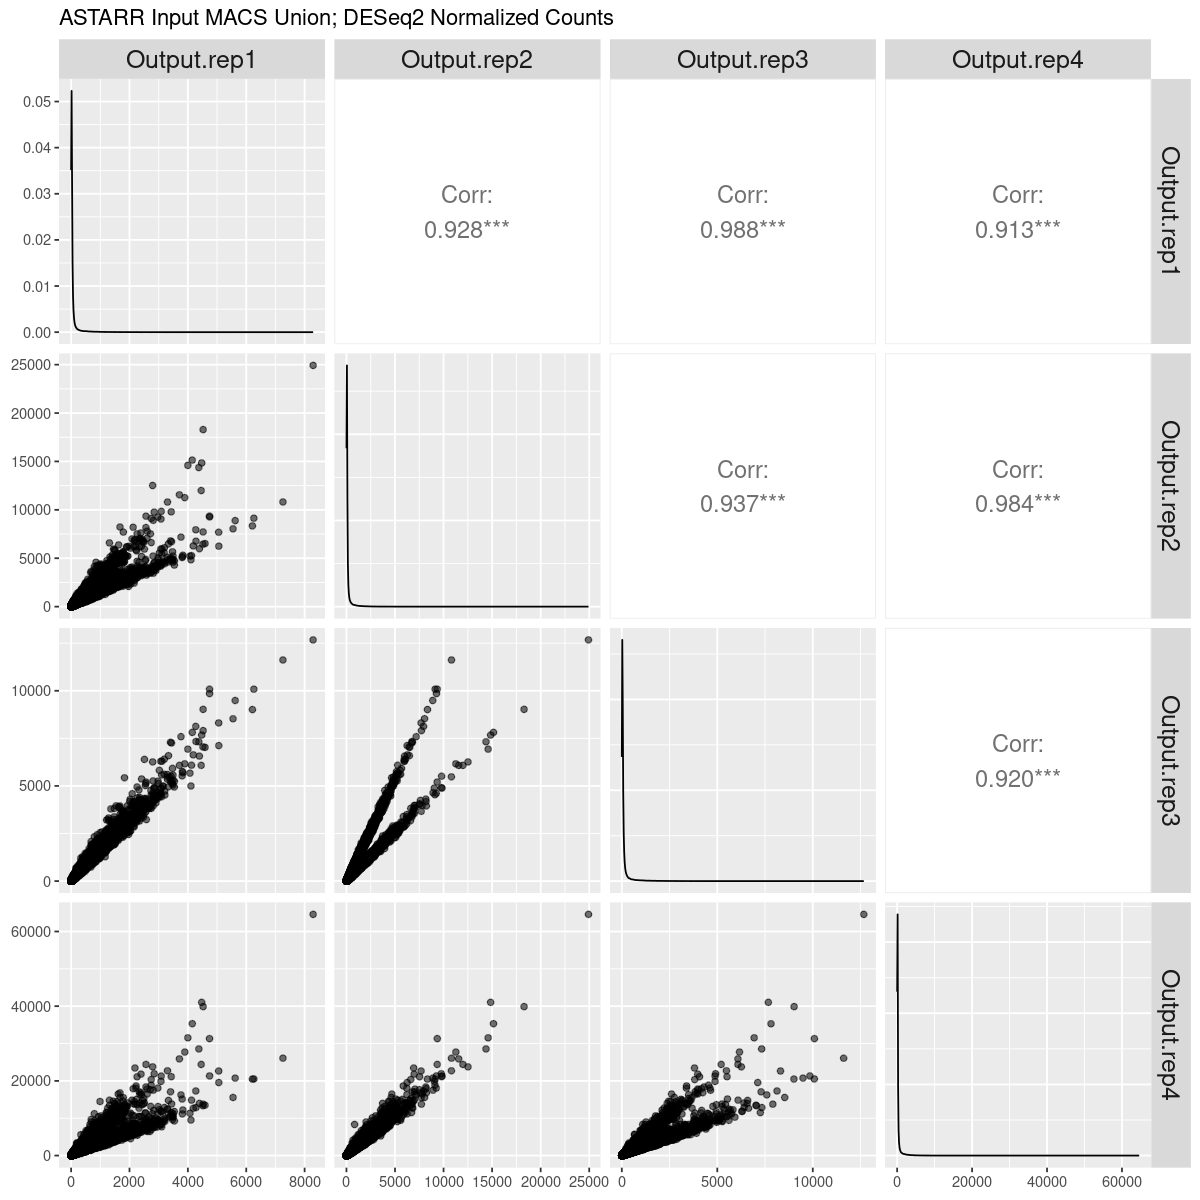

In [69]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggpairs(
    mat, 
    aes(alpha = 0.5),
    upper = list(continuous = wrap("cor", size = 5))
    ) +
    labs(title = "ASTARR Input MACS Union; DESeq2 Normalized Counts") +
    theme(
        strip.text = element_text(size = 15))

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for 

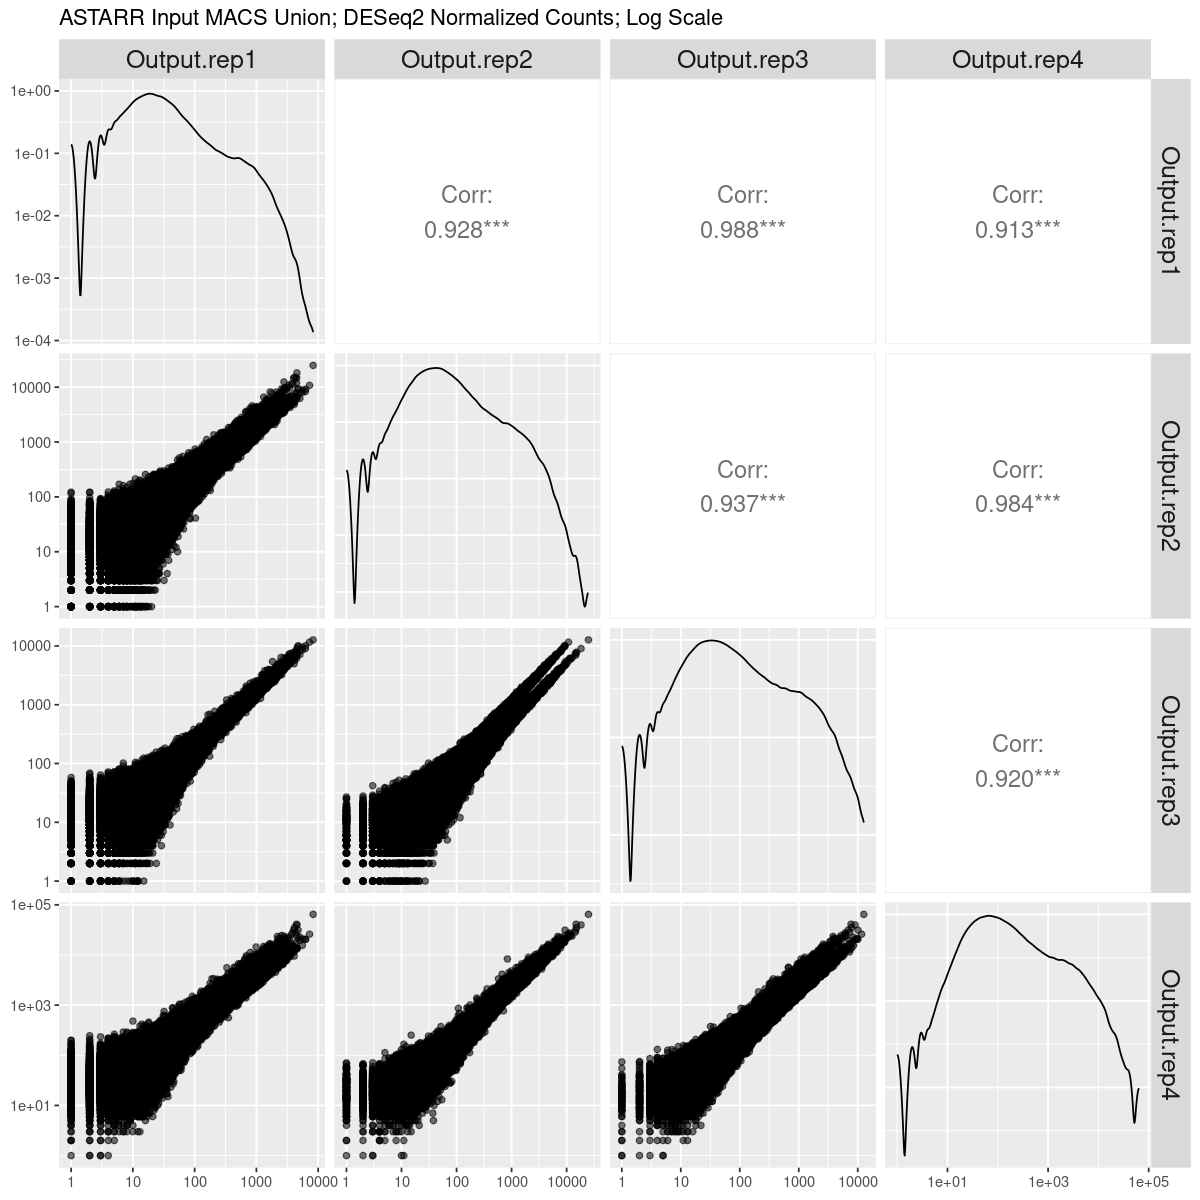

In [70]:
idx = apply(mat, 1, function(x){ all(x != 0 ) })
tmp = mat[idx,]

options(repr.plot.width = 10, repr.plot.height = 10)
ggpairs(
    tmp, 
    aes(alpha = 0.5),
    upper = list(continuous = wrap("cor", size = 5))
    ) +
    scale_x_continuous(trans='log10') +    
    scale_y_continuous(trans='log10') +
    labs(title = "ASTARR Input MACS Union; DESeq2 Normalized Counts; Log Scale") +
    theme(
        strip.text = element_text(size = 15))

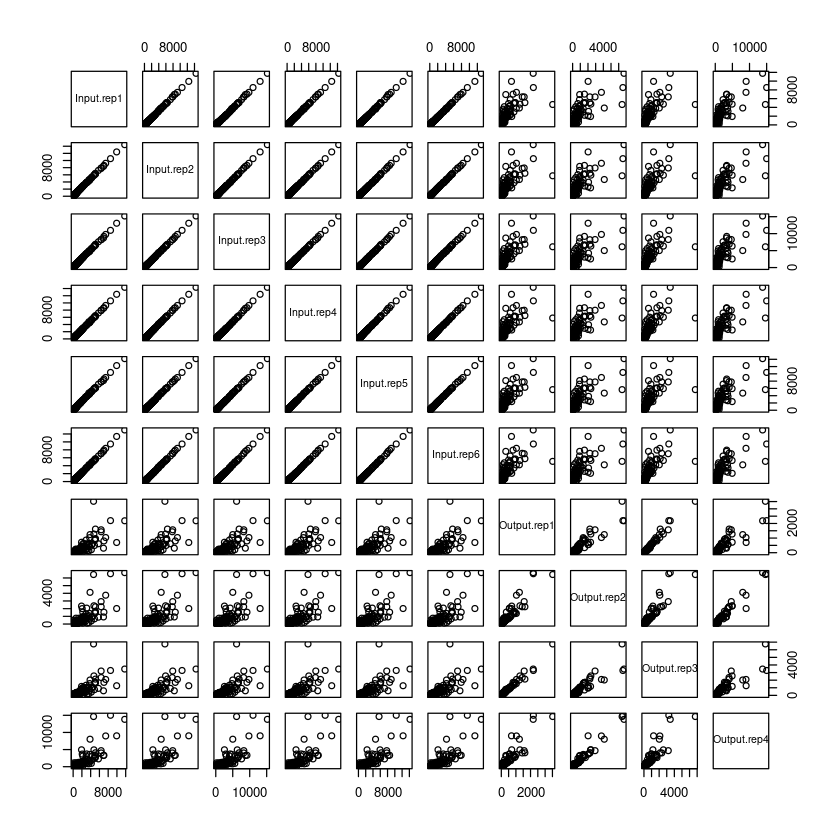

In [9]:
pairs(mat)

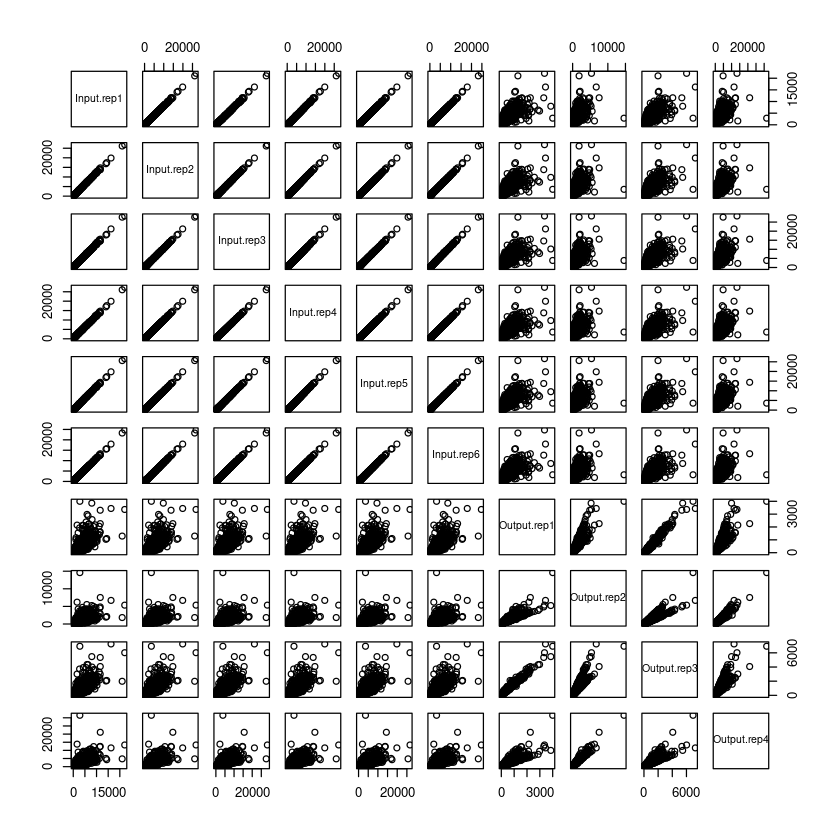

In [15]:
pairs(mat)

In [ ]:
tmp 

## Cumulative distribution

In [16]:
library(psych)

ERROR: Error in library(psych): there is no package called ‘psych’


In [17]:
library(psych)

ERROR: Error in library(psych): there is no package called ‘psych’
